In [139]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount('drive')

# For Colab
# csv_file_path = "/content/drive/MyDrive/Colab Notebooks/AI & Health/physionet-2022/the-circor-digiscope-phonocardiogram-dataset-1.0.3/"
# test_data = 'test_data.csv'
# train_data = 'training_data.csv'
# val_data = 'val.data.csv'

#Local
csv_file_path = "dataset/training_data.csv"

In [140]:
# Change train_data based on which .csv file want
df = pd.read_csv(csv_file_path)
df.tail(10)

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
932,85335,AV+PV+TV,Child,Female,125.0,21.4,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
933,85336,AV+MV,Child,Female,70.0,8.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
934,85337,AV+PV+TV+MV,Child,Male,130.0,27.3,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
935,85338,AV+PV+TV+MV,NaN,Female,NaN,NaN,True,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
936,85339,MV,Infant,Female,NaN,NaN,False,Present,MV,MV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
941,85349,AV+PV+TV,NaN,Female,NaN,NaN,True,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                942 non-null    int64  
 1   Recording locations:      942 non-null    object 
 2   Age                       868 non-null    object 
 3   Sex                       942 non-null    object 
 4   Height                    826 non-null    float64
 5   Weight                    837 non-null    float64
 6   Pregnancy status          942 non-null    bool   
 7   Murmur                    942 non-null    object 
 8   Murmur locations          179 non-null    object 
 9   Most audible location     179 non-null    object 
 10  Systolic murmur timing    178 non-null    object 
 11  Systolic murmur shape     178 non-null    object 
 12  Systolic murmur grading   178 non-null    object 
 13  Systolic murmur pitch     178 non-null    object 
 14  Systolic m

In [97]:
# Null count
df.isnull().sum()

Patient ID                    0
Recording locations:          0
Age                          74
Sex                           0
Height                      116
Weight                      105
Pregnancy status              0
Murmur                        0
Murmur locations            763
Most audible location       763
Systolic murmur timing      764
Systolic murmur shape       764
Systolic murmur grading     764
Systolic murmur pitch       764
Systolic murmur quality     764
Diastolic murmur timing     937
Diastolic murmur shape      937
Diastolic murmur grading    937
Diastolic murmur pitch      937
Diastolic murmur quality    937
Outcome                       0
Campaign                      0
Additional ID               802
dtype: int64

In [98]:
# Null Percentage
df.isnull().sum() * 100 / len(df)

Patient ID                   0.000000
Recording locations:         0.000000
Age                          7.855626
Sex                          0.000000
Height                      12.314225
Weight                      11.146497
Pregnancy status             0.000000
Murmur                       0.000000
Murmur locations            80.997877
Most audible location       80.997877
Systolic murmur timing      81.104034
Systolic murmur shape       81.104034
Systolic murmur grading     81.104034
Systolic murmur pitch       81.104034
Systolic murmur quality     81.104034
Diastolic murmur timing     99.469214
Diastolic murmur shape      99.469214
Diastolic murmur grading    99.469214
Diastolic murmur pitch      99.469214
Diastolic murmur quality    99.469214
Outcome                      0.000000
Campaign                     0.000000
Additional ID               85.138004
dtype: float64

# Visualizations Before Data Processing

## Age Distribution

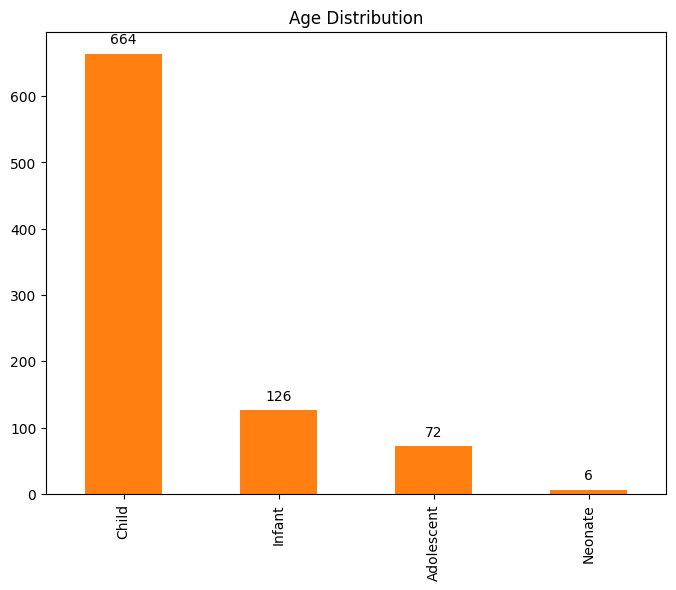

In [99]:
age_counts = df['Age'].value_counts().rename({0.5: 'Neonate', 6: 'Infant', 72: 'Child', 180: 'Adolescent', 240: 'Young Adult'})

plt.figure(figsize=(8,6))

# Plotting the bar chart with custom labels
ax = age_counts.plot(kind='bar', color='#ff7f10')
plt.title('Age Distribution')
plt.ylabel('')  # Remove the y-axis label for cleanliness

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## Sex Distribution

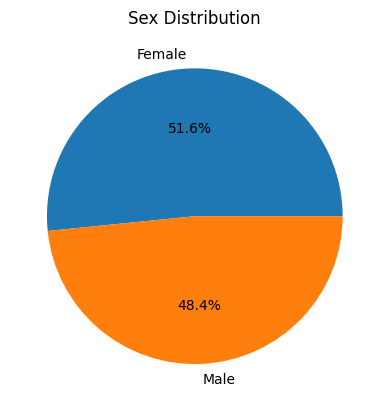

In [100]:
# Assuming 'df' is your DataFrame and 'Sex' has been encoded with 0s and 1s
sex_counts = df['Sex'].value_counts().rename({0: 'Female', 1: 'Male'})

# Plotting the pie chart with custom labels
sex_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Female', 'Male'])
plt.title('Sex Distribution')
plt.ylabel('')  # Remove the y-axis label for cleanliness
plt.show()

## Murmur Presence

## Murmur Outcome

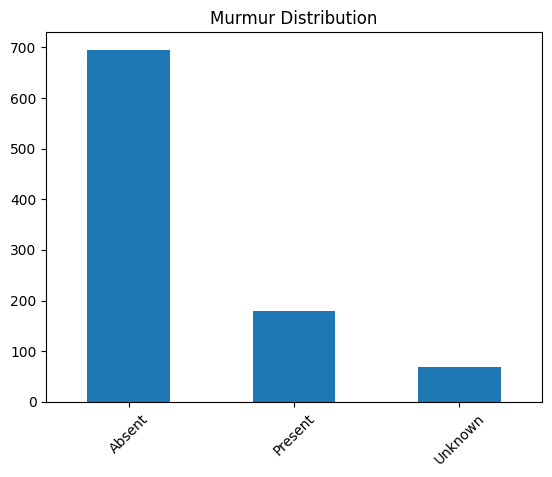

In [101]:
df['Murmur'].value_counts().rename({1: 'Present', 0: 'Absent'}).plot(kind='bar')
plt.title('Murmur Distribution')
plt.xticks(rotation=45)
plt.show()


Absent     695
Present    179
Unknown     68
Name: Murmur, dtype: int64


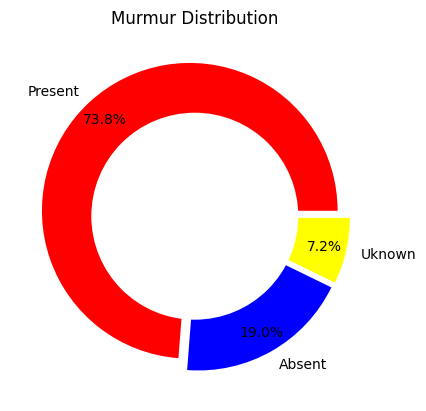

In [102]:
murmur_counts = df['Murmur'].value_counts().rename({1: 'Present', 0: 'Absent'})

print(murmur_counts)

colors = ['#FF0000', '#0000FF', '#FFFF00']
# explosion
explode = (0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(murmur_counts, colors=colors, labels=["Present", "Absent", "Uknown"],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Murmur Distribution')
 
# Displaying Chart
plt.show()

In [103]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define your mapping from numeric age values to strings
# age_labels = {0.5: 'Neonate', 6: 'Infant', 72: 'Child', 180: 'Adolescent', 240: 'Young Adult'}

# plt.figure(figsize=(12,6))

# # Plotting the countplot
# ax = sns.countplot(x='Age', hue='Murmur', data=df, order=age_labels.keys())
# plt.title('Murmur Presence by Age Group')

# # Setting custom x-tick labels to replace numeric ages with string labels
# ax.set_xticklabels([age_labels[age] for age in age_labels.keys()])
# plt.xticks(rotation=45)

# plt.show()


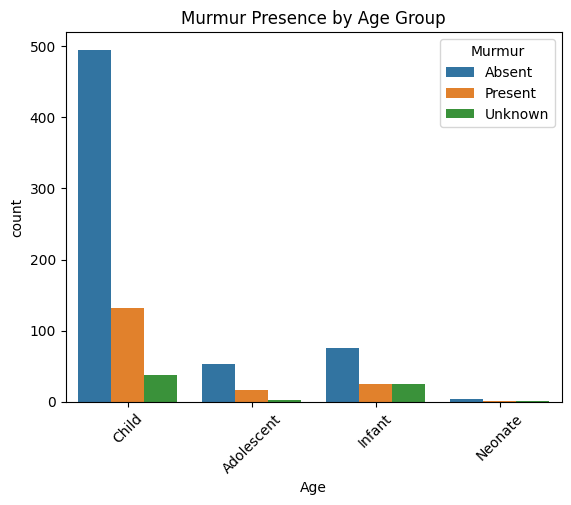

In [104]:
sns.countplot(x='Age', hue='Murmur', data=df)
plt.title('Murmur Presence by Age Group')
plt.xticks(rotation=45)
plt.show()

## Murmur Location Frequency

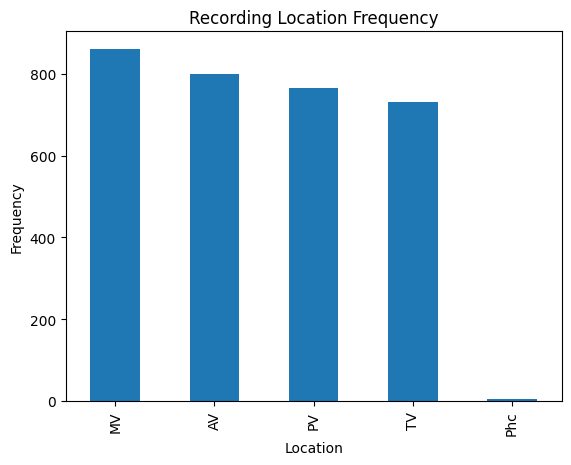

In [105]:
locations_split = df['Recording locations:'].str.split('+').apply(pd.Series).stack().reset_index(drop=True)

location_counts = locations_split.value_counts()

# Plot the frequency of Recording Locations
location_counts.plot(kind='bar')
plt.title('Recording Location Frequency')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

## Murmur Outcome By Recording Area

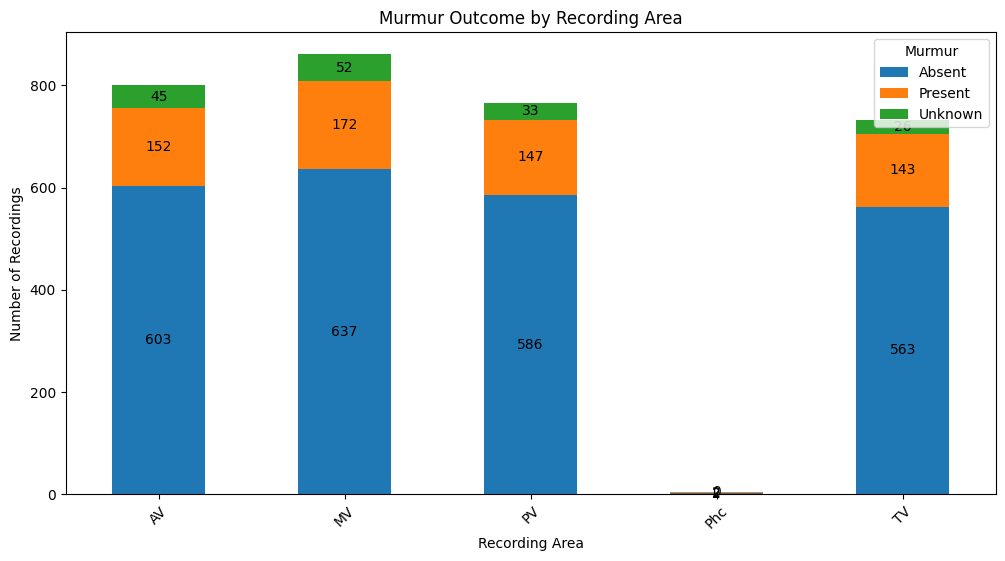

In [106]:
# Create a new DataFrame for analysis of murmur outcomes by recording area
# We'll start by expanding the original dataset to have a row for each area per patient, along with the Murmur outcome

# Expand the recording locations into separate rows, keeping the Murmur outcome
expanded_data = df.loc[df.index.repeat(df['Recording locations:'].str.split('+').apply(len))].copy()
expanded_data['Individual Location'] = locations_split.values

# Group by individual location and murmur outcome to get counts
location_murmur_counts = expanded_data.groupby(['Individual Location', 'Murmur']).size().unstack(fill_value=0)

# Step 4: Create Stacked Bar Chart for Murmur Outcome by Recording Area
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the stacked bar chart again
location_murmur_counts.plot(kind='bar', stacked=True, ax=ax, figsize=(12, 6))
plt.title('Murmur Outcome by Recording Area')
plt.xlabel('Recording Area')
plt.ylabel('Number of Recordings')
plt.xticks(rotation=45)
plt.legend(title='Murmur')

# Annotating each "Present" bar segment with the correct number
for i, location in enumerate(location_murmur_counts.index):
    height_sum = 0  # Track cumulative height of the bars to position the annotation correctly
    for outcome in location_murmur_counts.columns:
      value = location_murmur_counts.loc[location, outcome]
      # Position the annotation at the middle of the "Present" segment
      ax.text(i, height_sum + value / 2, str(int(value)), ha='center', va='center')
      height_sum += value

plt.show()

## Height and Weight Distribution

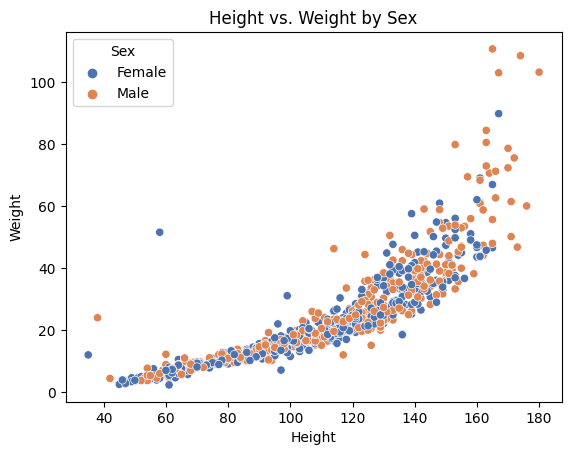

In [107]:
# Create the scatter plot
ax = sns.scatterplot(x='Height', y='Weight', data=df, hue='Sex', palette='deep')
plt.title('Height vs. Weight by Sex')

# Replace the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], title='Sex')

plt.show()


## Murmur Characteristics Analysis

## When Murmur is Present

In [108]:
# Filter the dataset for cases where Murmur is 'Present'
murmur_present_data = df[df['Murmur'] == 'Present']

# List of columns you're interested in
columns_of_interest = ["Most audible location", "Systolic murmur timing",
                       "Systolic murmur shape", "Systolic murmur grading", "Systolic murmur pitch",
                       "Systolic murmur quality"]

# Calculate the percentage of non-null values for each column of interest when Murmur is 'Present'
percentage_non_null_present = murmur_present_data[columns_of_interest].notnull().mean() * 100

percentage_non_null_present

Most audible location      100.000000
Systolic murmur timing      99.441341
Systolic murmur shape       99.441341
Systolic murmur grading     99.441341
Systolic murmur pitch       99.441341
Systolic murmur quality     99.441341
dtype: float64

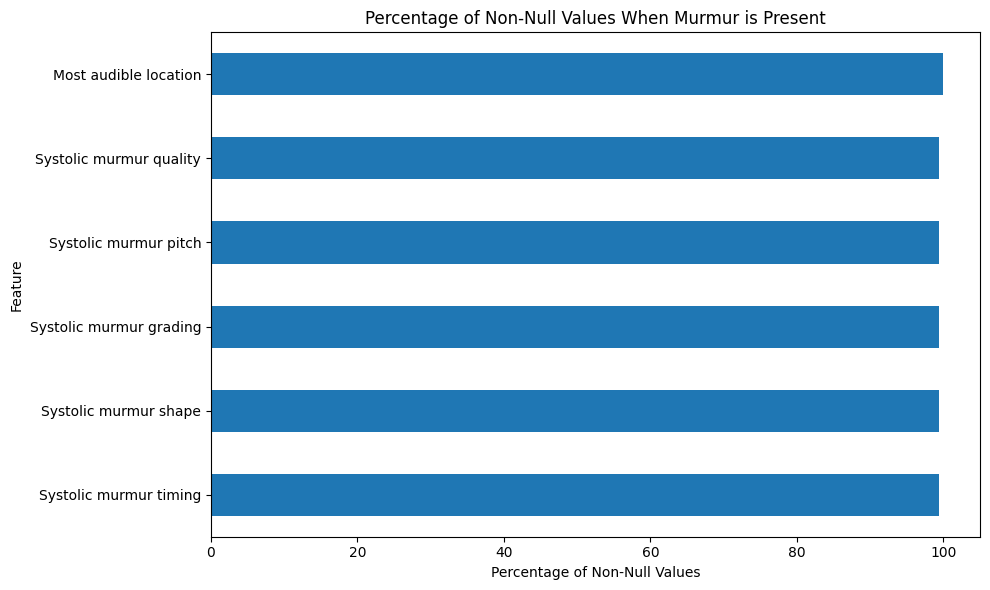

In [109]:
percentage_non_null_present.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Percentage of Non-Null Values When Murmur is Present')
plt.xlabel('Percentage of Non-Null Values')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Functions

In [141]:
def drop_unnecessary_features(df):
  drop_features = ["Murmur locations", "Most audible location", "Systolic murmur timing",
                    "Systolic murmur shape", "Systolic murmur grading", "Systolic murmur pitch",
                    "Systolic murmur quality", "Diastolic murmur timing", "Diastolic murmur shape",
                    "Diastolic murmur grading", "Diastolic murmur pitch", "Diastolic murmur quality",
                    "Additional ID", "Outcome", "Campaign"]
  df.drop(drop_features, axis=1, inplace=True)
  return df

In [142]:
def drop_unknown_murmur(df):
  df = df.drop(df[df['Murmur'] == 'Unknown'].index)
  return df

In [143]:
def encode_sex_and_pregnancy_status(df):
  df["Sex"] = df["Sex"].map({"Female": 0, "Male": 1})
  df["Pregnancy status"] = df["Pregnancy status"].map({False: 0, True: 1})
  return df

In [144]:
def normalise_ages(df):
  default_age_numbers = [0.5, 6., 72., 180., 240.]
  for i, row in df.iterrows():
      dist = default_age_numbers
      if row["Age"] not in default_age_numbers:
          dist = [abs(x - row["Age"]) for x in dist]
          minimum = dist.index(min(dist))
          df.at[i, 'Age'] = default_age_numbers[minimum]
  return df

In [145]:
def handle_missing_height_weight(df, pregnant):
  for index, row in df.iterrows():
    mask = row['Pregnancy status'] == pregnant
    if mask and (pd.isnull(row['Height']) or pd.isnull(row['Weight'])):
      if pd.notnull(row['Age']):
        if pregnant:
          similar_mask = (df['Sex'] == row['Sex']) & (df['Age'] == "Adolescent") & (df.index != index)
        else:
          similar_mask = (df['Sex'] == row['Sex']) & (df['Age'] == row['Age']) & (df.index != index)

        height_replacement = df.loc[similar_mask, 'Height'].mean() if pd.isnull(row['Height']) else row['Height']
        weight_replacement = df.loc[similar_mask, 'Weight'].mean() if pd.isnull(row['Weight']) else row['Weight']

        random_add = random.randint(0, 20) if pregnant else 0

        df.at[index, 'Height'] = np.round((height_replacement + random_add), 2)
        # df.at[index, 'Weight'] = weight_replacement + random_add
  return df

In [146]:
def handle_missing_height(df, pregnant):
    for index, row in df.iterrows():
        mask = row['Pregnancy status'] == pregnant
        if mask and pd.isnull(row['Height']):  # Check only for missing Height
            if pd.notnull(row['Age']):
                if pregnant:
                    similar_mask = (df['Sex'] == row['Sex']) & (df['Age'] == "Adolescent") & (df.index != index)
                else:
                    similar_mask = (df['Sex'] == row['Sex']) & (df['Age'] == row['Age']) & (df.index != index)

                # Calculate the mean height from similar individuals to impute the missing value
                height_replacement = df.loc[similar_mask, 'Height'].mean()
                df.at[index, 'Height'] = height_replacement
                return df


In [147]:
# def handle_missing_height(df):
#   for index, row in df.iterrows():
#     if pd.isnull(row['Height']):
#       if pd.notnull(row['Age']):
#         similar_mask = (df['Sex'] == row['Sex']) & (df['Age'] == row['Age']) & (df.index != index)

#         height_replacement = df.loc[similar_mask, 'Height'].mean() if pd.isnull(row['Height']) else row['Height']

#         print(similar_mask)
#         print('height replacement')
#         print(height_replacement)

#         df.at[index, 'Height'] = height_replacement
#         return df

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def handle_missing_weight(df):
  # Filter rows with non-missing height and weight
  data_with_values = df.dropna(subset=['Height', 'Weight'])

  # Prepare the features (X) and target (y)
  X = data_with_values[['Height']]
  y = data_with_values['Weight']

  # Define the degree of the polynomial
  degree = 8  # This can be adjusted based on the relationship you observe

  # Create a polynomial regression model
  polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

  # Fit the model
  polyreg.fit(X, y)

  # Predict weights across the range of heights for visualization
  X_fit = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)  # Generating points for plotting
  y_fit = polyreg.predict(X_fit)

  # Visualize the data points and the polynomial regression line
  plt.figure(figsize=(10, 6))
  plt.scatter(X, y, color='blue', label='Actual data')
  plt.plot(X_fit, y_fit, color='red', label=f'Polynomial degree {degree} fit')
  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.title('Polynomial Regression Fit: Weight vs. Height')
  plt.legend()
  plt.show()

  # Predict and impute missing weights in the original DataFrame
  missing_weight = df['Weight'].isnull() & df['Height'].notnull()
  predicted_weights = polyreg.predict(df.loc[missing_weight, ['Height']])

  # Optionally, round predicted weights to 2 decimal places if needed
  predicted_weights = np.round(predicted_weights, 2)

  # Impute missing weights with the predictions
  df.loc[missing_weight, 'Weight'] = predicted_weights

  return df

In [149]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# def handle_missing_weight(df):

#   # Filter rows with non-missing height and weight
#   data_with_values = df.dropna(subset=['Height', 'Weight'])

#   # Prepare the features (X) and target (y)
#   X = data_with_values[['Height']]
#   y = data_with_values['Weight']

#   # Define the degree of the polynomial features
#   degree = 2  # For example, a quadratic model

#   # Create a pipeline that first transforms the features into polynomial features, then fits a linear model
#   poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#   # Fit the model on the available data
#   poly_model.fit(X, y)

#   # Predict weights for rows where weight is missing but height is available
#   missing_weight = df['Weight'].isnull() & df['Height'].notnull()
#   X_missing = df.loc[missing_weight, ['Height']]
#   predicted_weights = poly_model.predict(X_missing)

#   # Impute missing weights with the predictions, rounding to 2 decimal places if desired
#   df.loc[missing_weight, 'Weight'] = np.round(predicted_weights, 2)

#   # return df

In [150]:
def replace_pregnant_ages(df):
  mask = df["Pregnancy status"] == 1
  random_states = np.random.rand(mask.sum())
  df.loc[mask, "Age"] = np.where(random_states > 0.33, "Adolescent", "Young Adult")
  return df

In [151]:
def fill_null_ages(df):
  temp = df.copy()
  temp['Height_normalized'] = (temp['Height'] - temp['Height'].mean()) / temp['Height'].std()
  temp['Weight_normalized'] = (temp['Weight'] - temp['Weight'].mean()) / temp['Weight'].std()

  print(temp['Height_normalized'].isnull())
  print(temp['Weight_normalized'].isnull())

  n_clusters = 4
  kmeans = KMeans(n_clusters=n_clusters)
  temp['Cluster'] = kmeans.fit_predict(temp[['Height_normalized', 'Weight_normalized']])
  temp['Age'] = pd.to_numeric(temp['Age'], errors='coerce')
  cluster_ages = temp.groupby('Cluster')['Age'].mean().to_dict()
  df['Age'] = temp.apply(lambda row: cluster_ages[row['Cluster']] if pd.isnull(row['Age']) else row['Age'], axis=1)
  return df

In [152]:
def age_float_conversion(df):
  age_conversion = {"Neonate": 0.5, "Infant": 6, "Child": 72, "Adolescent": 180, "Young Adult": 240}
  df['Age'] = df['Age'].replace(age_conversion)
  return df

In [153]:
def encode_murmur_and_outcome(df):
  df["Murmur"] = df["Murmur"].map({"Present": 0, "Absent": 1})
  # df["Outcome"] = df["Outcome"].map({"Abnormal": 0, "Normal": 1})
  return df

In [154]:
def fill_null(df):
  df.fillna(value = 0.0, inplace = True)
  return df

# More stuff

In [155]:
impute_df = drop_unnecessary_features(df)

In [156]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            942 non-null    int64  
 1   Recording locations:  942 non-null    object 
 2   Age                   868 non-null    object 
 3   Sex                   942 non-null    object 
 4   Height                826 non-null    float64
 5   Weight                837 non-null    float64
 6   Pregnancy status      942 non-null    bool   
 7   Murmur                942 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 52.6+ KB


In [157]:
impute_df = drop_unknown_murmur(impute_df)

In [158]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 941
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            874 non-null    int64  
 1   Recording locations:  874 non-null    object 
 2   Age                   802 non-null    object 
 3   Sex                   874 non-null    object 
 4   Height                765 non-null    float64
 5   Weight                775 non-null    float64
 6   Pregnancy status      874 non-null    bool   
 7   Murmur                874 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 55.5+ KB


In [159]:
preg = impute_df.loc[impute_df['Pregnancy status']==True,:]
print(preg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 84 to 941
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            68 non-null     int64  
 1   Recording locations:  68 non-null     object 
 2   Age                   0 non-null      object 
 3   Sex                   68 non-null     object 
 4   Height                0 non-null      float64
 5   Weight                0 non-null      float64
 6   Pregnancy status      68 non-null     bool   
 7   Murmur                68 non-null     object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 4.3+ KB
None


In [160]:
impute_df = encode_sex_and_pregnancy_status(impute_df)

In [161]:
impute_df = handle_missing_height_weight(impute_df, False)

In [162]:
impute_df = replace_pregnant_ages(impute_df)

In [163]:
impute_df = handle_missing_height_weight(impute_df, True)

In [164]:
impute_df['Height'].isnull().sum()

0

In [165]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 941
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            874 non-null    int64  
 1   Recording locations:  874 non-null    object 
 2   Age                   870 non-null    object 
 3   Sex                   874 non-null    int64  
 4   Height                874 non-null    float64
 5   Weight                775 non-null    float64
 6   Pregnancy status      874 non-null    int64  
 7   Murmur                874 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 93.7+ KB


In [166]:
# df = handle_missing_height_weight(df, False) # True = pregnant, False = Not Pregnant
# df = handle_missing_height_weight(df, True) # True = pregnant, False = Not Pregnant

/usr/local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


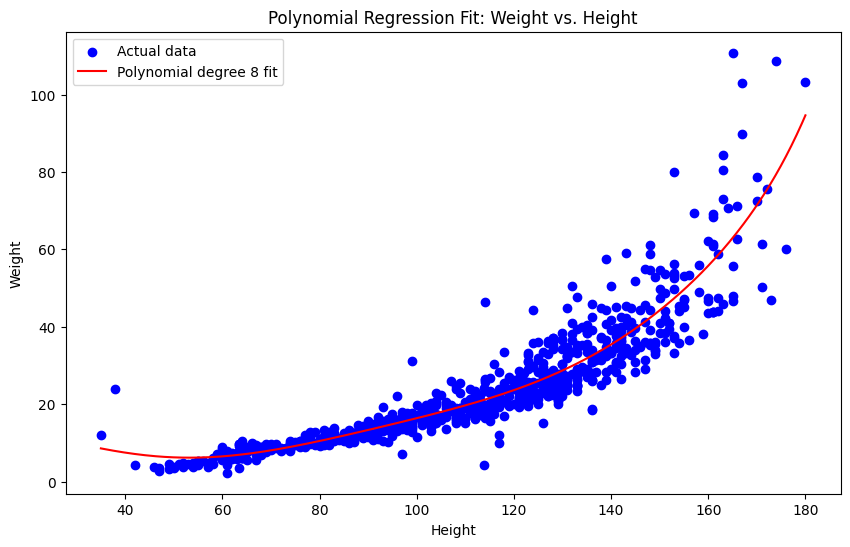

In [170]:
df = handle_missing_weight(impute_df)

In [171]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 941
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            874 non-null    int64  
 1   Recording locations:  874 non-null    object 
 2   Age                   870 non-null    object 
 3   Sex                   874 non-null    int64  
 4   Height                874 non-null    float64
 5   Weight                874 non-null    float64
 6   Pregnancy status      874 non-null    int64  
 7   Murmur                874 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 93.7+ KB


In [172]:
impute_df = age_float_conversion(impute_df)

In [173]:
impute_df = fill_null_ages(impute_df)

0      False
1      False
3      False
4      False
5      False
       ...  
937    False
938    False
939    False
940    False
941    False
Name: Height_normalized, Length: 874, dtype: bool
0      False
1      False
3      False
4      False
5      False
       ...  
937    False
938    False
939    False
940    False
941    False
Name: Weight_normalized, Length: 874, dtype: bool


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [174]:
impute_df = normalise_ages(impute_df)

In [175]:
impute_df["Age"].unique()

array([ 72. , 180. ,   6. , 240. ,   0.5])

In [176]:
impute_df = encode_murmur_and_outcome(impute_df)

In [177]:
# df = fill_null(df) # Used only on Test and Validation data in Project code

In [178]:
impute_df['Weight'].isnull().any()

False

In [179]:
impute_df.describe()

,Patient ID,Age,Sex,Height,Weight,Pregnancy status,Murmur
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,66430.670481,82.320938,0.488558,116.137471,27.284922,0.077803,0.795195
std,16898.283852,51.291334,0.500155,31.786677,18.664390,0.268015,0.403790
min,2530.000000,0.500000,0.000000,35.000000,2.300000,0.000000,0.000000
25%,50260.250000,72.000000,0.000000,94.000000,13.900000,0.000000,1.000000
50%,68426.000000,72.000000,0.000000,117.000000,22.290000,0.000000,1.000000
75%,84936.750000,72.000000,1.000000,139.000000,35.425000,0.000000,1.000000
max,85349.000000,240.000000,1.000000,180.730000,110.800000,1.000000,1.000000


In [180]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 941
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            874 non-null    int64  
 1   Recording locations:  874 non-null    object 
 2   Age                   874 non-null    float64
 3   Sex                   874 non-null    int64  
 4   Height                874 non-null    float64
 5   Weight                874 non-null    float64
 6   Pregnancy status      874 non-null    int64  
 7   Murmur                874 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 93.7+ KB


In [181]:
impute_df.isnull().any()

Patient ID              False
Recording locations:    False
Age                     False
Sex                     False
Height                  False
Weight                  False
Pregnancy status        False
Murmur                  False
dtype: bool

In [182]:
corr_temp = impute_df.drop(["Patient ID", "Recording locations:"], axis=1)

In [183]:
corr_matrix = corr_temp.corr()

<AxesSubplot: >

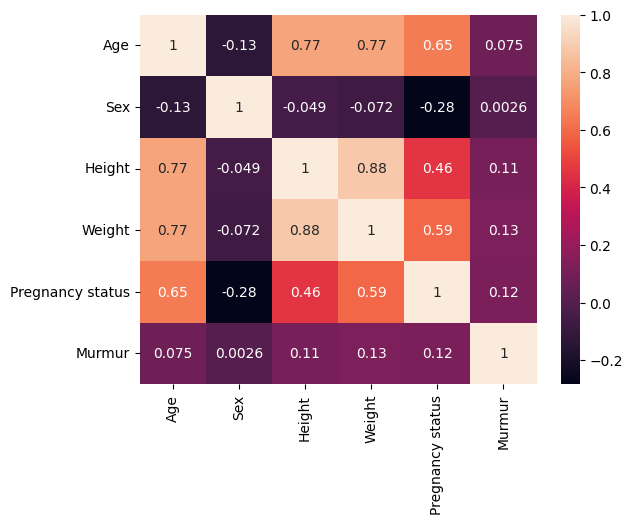

In [184]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True)

In [185]:
temp_df = impute_df.copy()

In [186]:
var = ['Age', 'Sex', 'Pregnancy status']
murmur_cat = pd.melt(temp_df, id_vars=['Murmur'], value_vars=var)

In [187]:
print(murmur_cat)

      Murmur          variable  value
0          1               Age   72.0
1          0               Age   72.0
2          0               Age   72.0
3          0               Age   72.0
4          1               Age   72.0
...      ...               ...    ...
2617       1  Pregnancy status    0.0
2618       1  Pregnancy status    0.0
2619       0  Pregnancy status    0.0
2620       1  Pregnancy status    0.0
2621       1  Pregnancy status    1.0

[2622 rows x 3 columns]


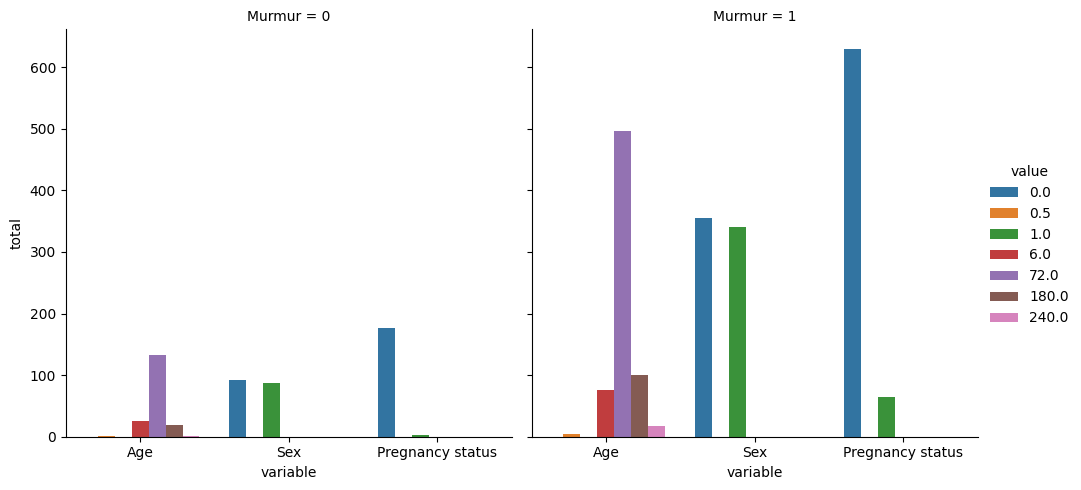

In [188]:
graph = sns.catplot(data=murmur_cat, kind='count', x='variable', hue='value', col='Murmur')
graph.set_ylabels('total', fontsize=10)